#Análise exploratória, feito entre os anos de 2022 e 2023

**Projeto foi feito com intuito de identificar padrões de compras e comportamentos relevantes**
1. qual a média de preco de venda?
2. qual marca vende mais?
3. qual modelo vende mais?
4. e quanto a cor?
5. e quanto ao tipo de carro?
6. existe uma transmissão que vende mais?
7. quem compra mais? homem ou mulher?
8. exite sazonalidade? qual momento ideal para lancar um novo modelo? como ele deveria ser?
9. qual revendedor vende mais? em qual regiao?

In [ ]:
#importar as lib necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
df=pd.read_csv('/content/Car Sales.xlsx - car_data.csv')
df=df.rename(columns={'Date':'Data',
                      'Dealer_Name':'Revendedor',
                      'Customer Name':'Nome_cliente',
                      'Gender':'Genero',
                      'Company':'Marca',
                      'Transmission':'Transmissao',
                      'Color':'Cor',
                      'Price ($)':'preco($)',
                      'Body Style':'Tipo',
                      'Dealer_Region':'Região_Revendedor'})
colunasr=['Car_id','Annual Income','Phone','Dealer_No ','Nome_cliente','Engine']
for coluna in colunasr:
  df.drop(coluna,axis=1,inplace=True)
df.head(3)

In [ ]:
df.info()#Verifiquei dados e valores nulos, dataset está ok
df.isnull().sum()

# Analise carro

1. qual a média de preco de venda?
* *a media de preco e 28k, com minima de 12k e max de 85k. A media nao fica distante da mediana, que e 23k*

In [239]:
# descritiva dos precos
df.describe().T


,count,mean,std,min,25%,50%,75%,max
preco($),23906.0,28090.247846,14788.687608,1200.0,18001.0,23000.0,34000.0,85800.0


2.qual marca vende mais?
* *as marcas mais vendidas sao: Chevrolet, Dodge, Ford e Volkswagen*

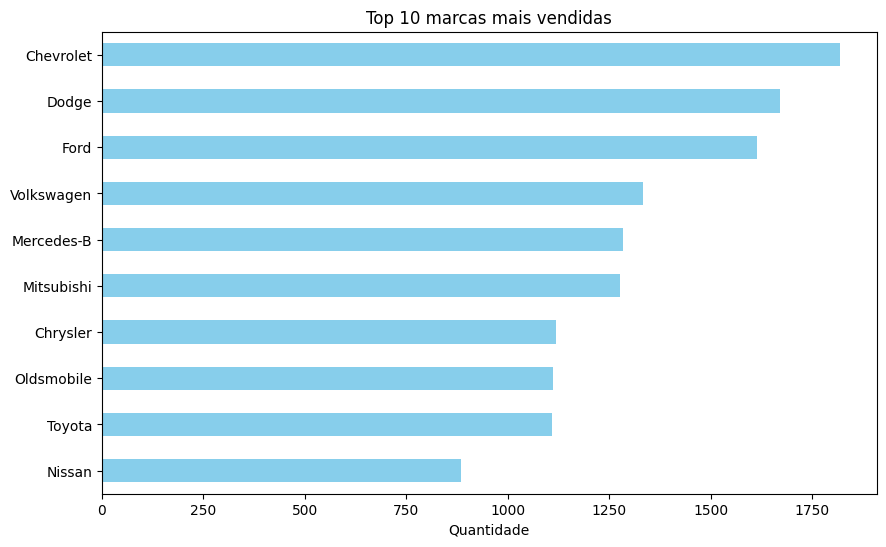

In [182]:
# aqui verifiquei as marcas mais vendidas, filtrando os top 10(em obervasões)
top_10_marcas = df['Marca'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_marcas.plot(kind='barh', color='skyblue')
# titulos e eixos
plt.title('Top 10 marcas mais vendidas')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()


3. qual modelo vende mais?
* *os modelos mais vendidas sao: Diamante, Silhouette, Prizm e Passat*


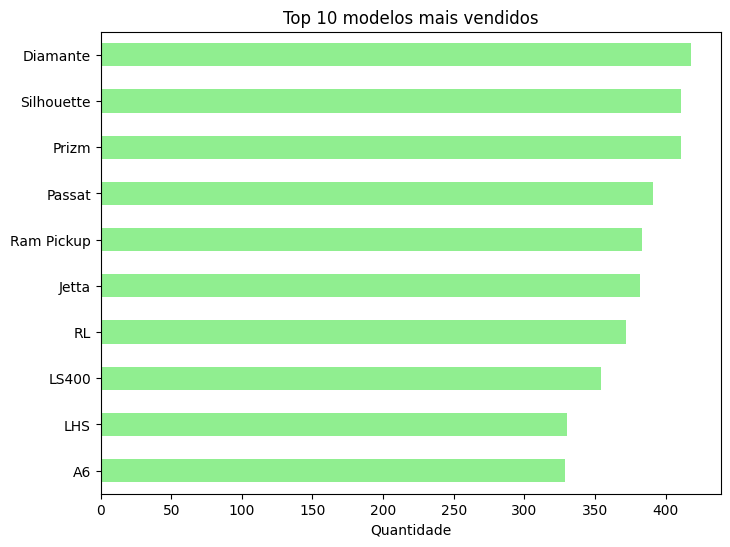

In [183]:
# aqui foram os modelos mais vendidos
top_10_modelos= df['Model'].value_counts().head(10)
top_10_modelos.plot(kind='barh',figsize=(8,6),color='lightgreen')
# titulos e eixos
plt.title('Top 10 modelos mais vendidos')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()


* analise de outliers e distribuicao de preco
* *alguns carros do mesmo modelo tem precos de vendas diferentes*

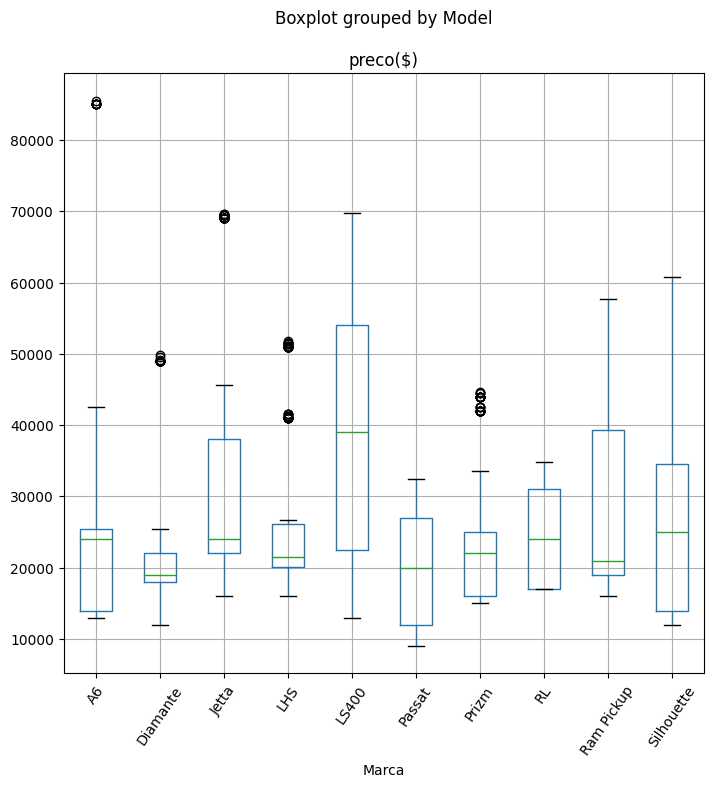

In [241]:
#Verifiquei os outliers por modelos
top_10_modelos_O=df['Model'].value_counts().head(10).index.tolist()
top_10_O = df[df['Model'].isin(top_10_modelos_O)]
top_10_O.boxplot(column='preco($)', by='Model', figsize=(8, 8))
# titulos e eixos
plt.xlabel('Marca')
plt.xticks(rotation=55)#deixar eixo x na horizontal
plt.show()

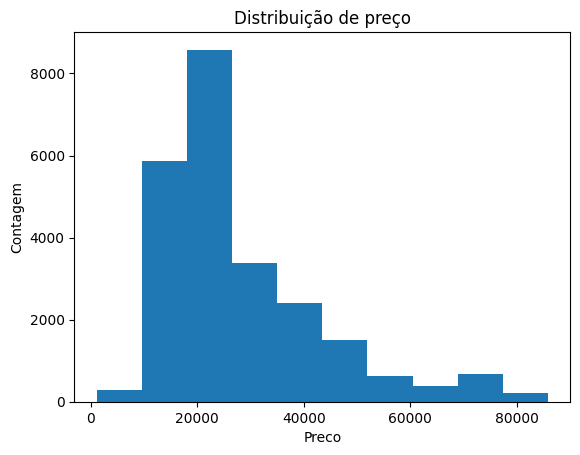

In [249]:
#historograma para verificar distribuicao do preco
preco=df['preco($)']
preco.plot(kind='hist')
# titulos e eixos
plt.title('Distribuição de preço')
plt.ylabel('Contagem')
plt.xlabel('Preco')
plt.show()

# Análise marca

* *A hyundai tem o menor valor médio de venda e Cadillac a maior*


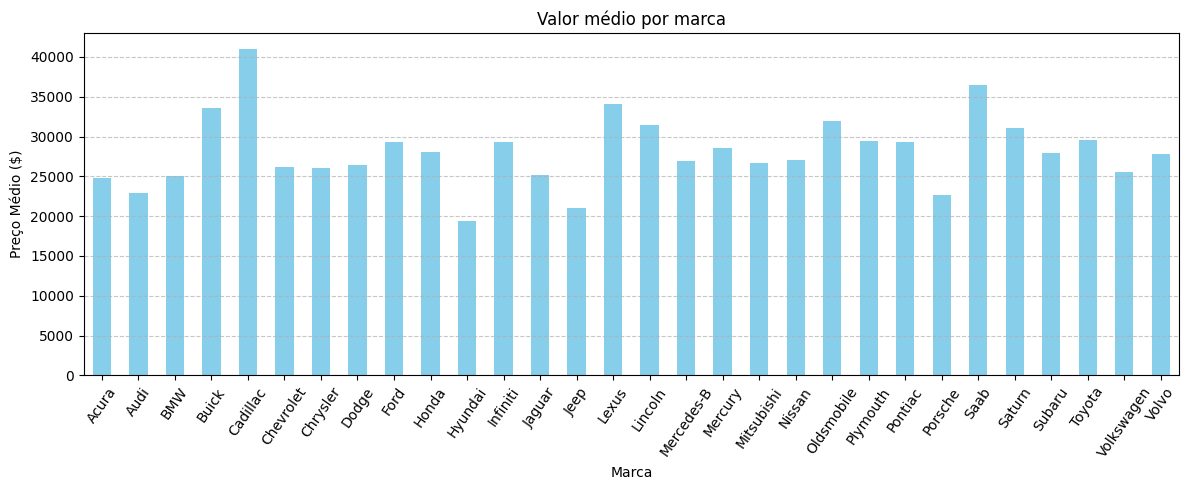

In [250]:
#agrupei o df por marca e preco,
grupo= df.groupby('Marca')['preco($)'].mean()
# plotei gráfico de barras
grupo.plot(kind='bar',figsize=(12,5), color='skyblue')
# titulos e eixos
plt.title('Valor medio por marca')
plt.xlabel('Marca')
plt.ylabel('Preco medio($)')
plt.xticks(rotation=55)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. e quanto a cor?

* *A maioria das marcas vendedram cores: branca e preta, com destaque para o branco, com maior volume de venda($)*

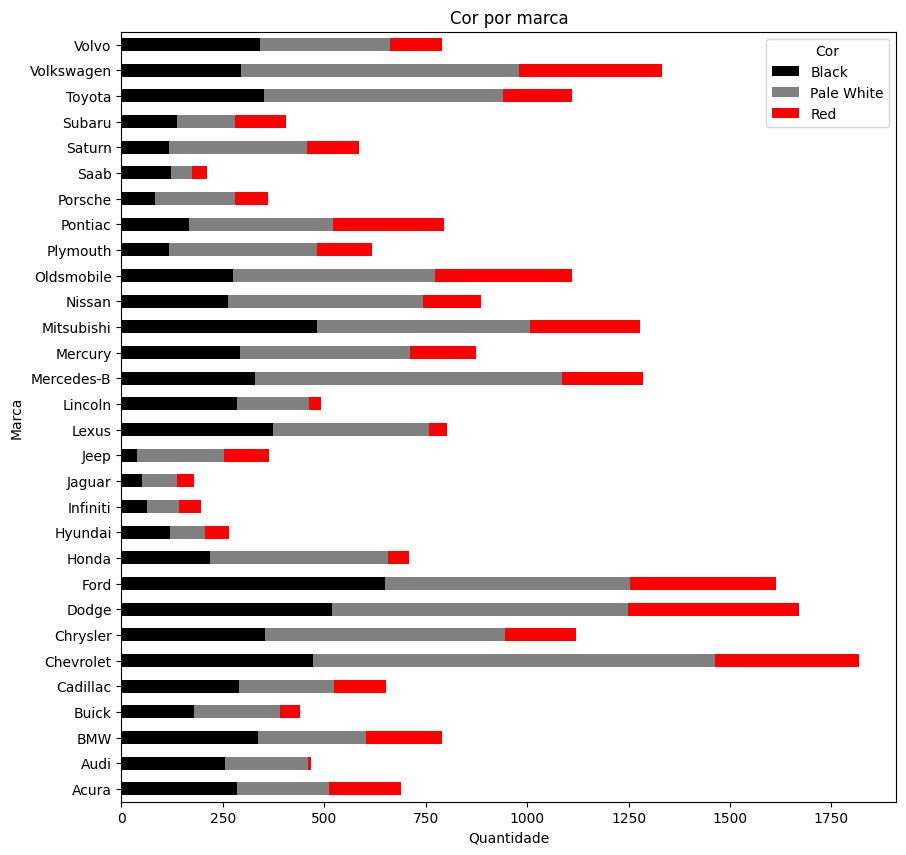

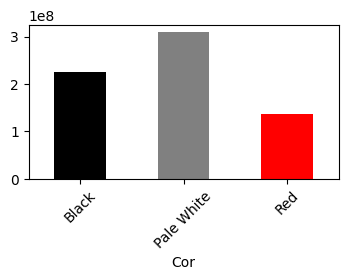

In [266]:
#fiz um grafico empilhado, dsitribuindo as cores por marca
marcas4 = df['Marca'].value_counts().index.tolist()
cor4 = pd.crosstab(df[df['Marca'].isin(marcas4)]['Marca'], df['Cor'])
cor4.plot(kind='barh', figsize=(10, 10), stacked=True, color=['black', 'gray', 'red'])
# titulos e eixos
plt.title('Cor por marca')
plt.xlabel('Quantidade')
plt.ylabel('Marca')
plt.show()


#fiz um segundo grafico, para mostrar somente as cores
cor41=df.groupby('Cor')['preco($)'].sum()
cor41.plot(kind='bar',figsize=(4,2),color=['black','gray','red'])
plt.xticks(rotation=45)
plt.show()

5. e quanto ao tipo de carro?
* *o tipo de carro mais vendido são: SUV e Hatch*

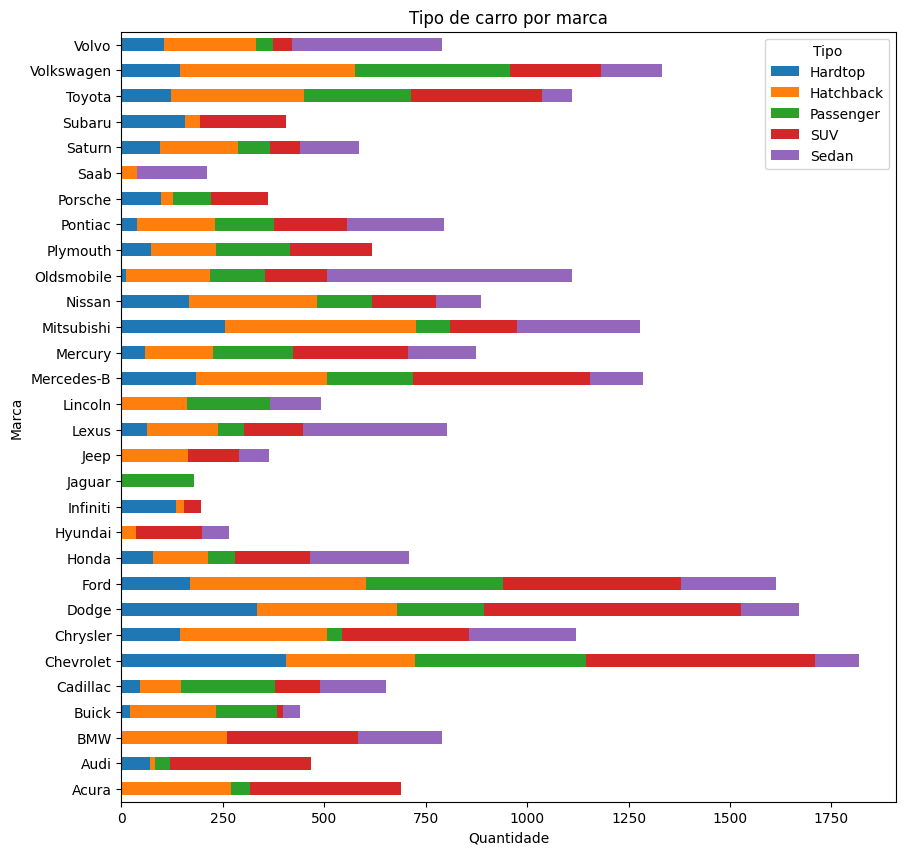

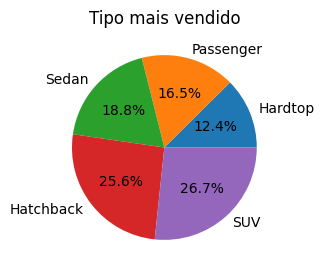

In [254]:
#tabela cruzada
marcas5 = df['Marca'].value_counts().index.tolist()
cor5 = pd.crosstab(df[df['Marca'].isin(marcas5)]['Marca'], df['Tipo'])
cor5.plot(kind='barh', figsize=(10,10),stacked=True)
# titulos e eixos..
plt.title('Tipo de carro por marca')
plt.xlabel('Quantidade')
plt.show()

#plotei tipos mais vendidos em pizza
tipo5 = df['Tipo'].value_counts(ascending=True)
tipo5.plot(kind='pie',figsize=(3,3),autopct='%1.1f%%')
plt.title('Tipo mais vendido')
plt.ylabel('')
plt.show()

6. existe uma transmissão que vende mais?
* *a transmissao que mais vende e a auto*

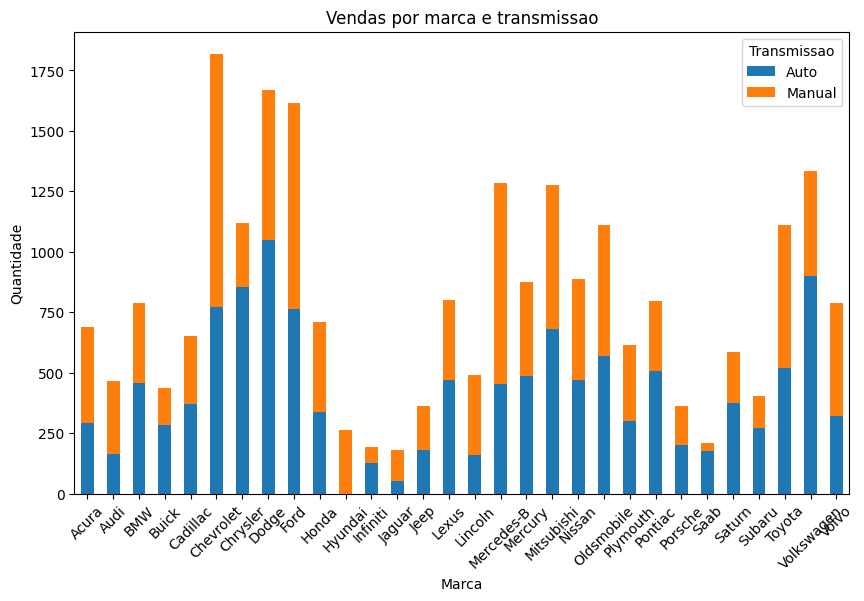

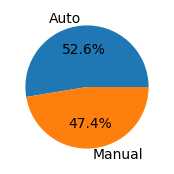

In [255]:
#grafico empilhado marca e transmissao
marca6 = df.groupby(['Marca', 'Transmissao']).size().unstack()
marca6.plot(kind='bar', stacked=True, figsize=(10, 6))
# titulos e eixos
plt.title('Vendas por marca e transmissao')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

#grafico pizza para transmissao
trans6=df['Transmissao'].value_counts()
trans6.plot(kind='pie',figsize=(2,2),autopct='%1.1f%%')
plt.title('')
plt.ylabel('')
plt.show()

 * A hyundai, apesar de ter o menor preco medio de venda, nao teve registros de vendas em transmissao automatica, assim como pouco registro de modelos hatch, o que explicaria nao ter vendido tanto

# Análise gênero

7. quem compra mais? homem ou mulher?
* *homens compram mais e tanto homens quanto mulheres preferem carros com a
transmissao auto*


In [ ]:
#novamente tabela cruzada
venda7=pd.crosstab(df['Genero'],df['Transmissao'])
venda7.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

*  *Tanto homens quanto mulheres preferem a cor branca*

Text(0.5, 1.0, 'Cores mais vendidas')

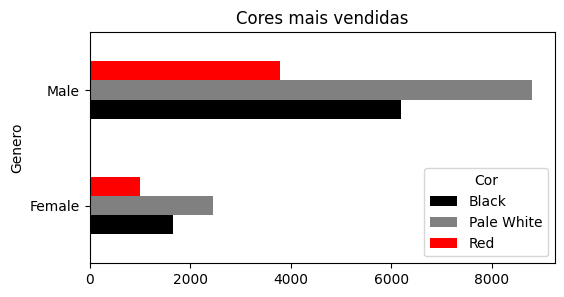

In [ ]:
#tabela cruzada
cor7=pd.crosstab(df['Genero'],df['Cor'])
cor7.plot(kind='barh',figsize=(6,3),color=['black','gray','red'])
plt.title('Cores mais vendidas')

* *Tanto homens quanto mulheres preferem os modelos SUV e Hatch*

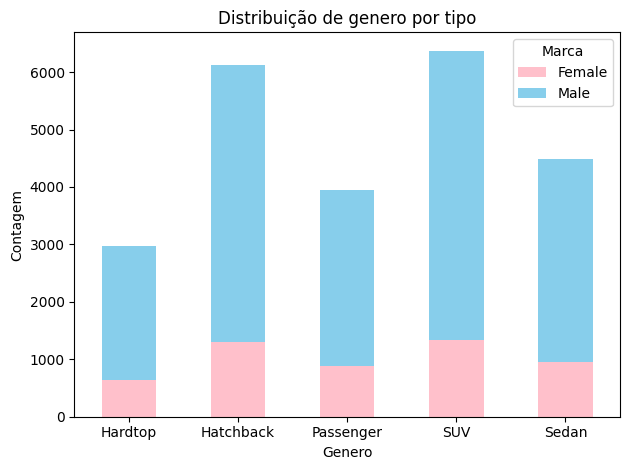

In [261]:
# tabela cruzada
cruzado = pd.crosstab(df['Tipo'], df['Genero'])

# plotei em colunas empilhadas

cruzado.plot(kind='bar', stacked=True, color=['pink', 'skyblue'])
#titulos e eixos
plt.title('Distribuição de genero por tipo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)#deixar eixo x na horizontal
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

8. exite sazonalidade? qual momento ideal para lancar um novo modelo? como ele deveria ser?
* *Períodos com mais vendas foram em Out e Dez de 2022, Set,Out e Dez de 2023. Tem uma sazonalidade para vendas de carros em fim de ano, 3 e 4  trimestre*


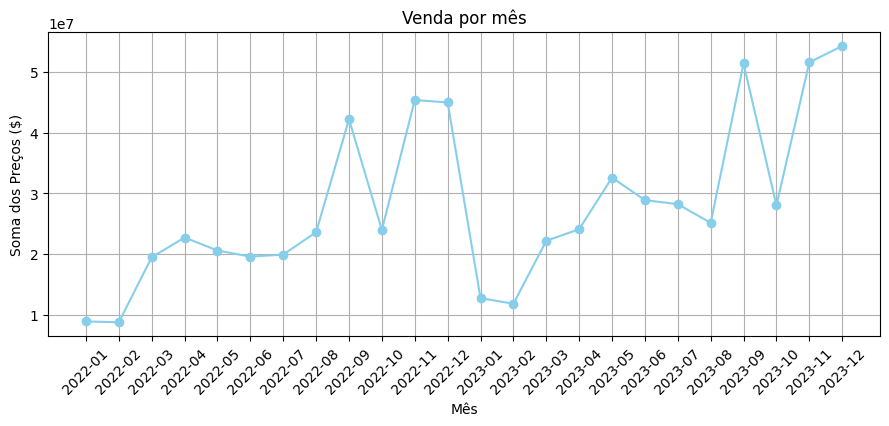

In [ ]:
# data do df para tipo data
df['Data'] = pd.to_datetime(df['Data'])

# extrai o mes do df
df['Mes'] = df['Data'].dt.to_period('M')

# somei os precos, agrupando por mes
precomes = df.groupby('Mes')['preco($)'].sum()

# plotei em linha
plt.figure(figsize=(9, 4))
plt.plot(precomes.index.astype(str), precomes.values, marker='o', color='skyblue', linestyle='-')

# titulos e eixos..
plt.title('Venda por mês')
plt.xlabel('Mês')
plt.ylabel('Soma dos Preços ($)')
plt.grid(True)  # adicionei grade
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

9. qual revendedor vende mais? em qual regiao?
* *todas as regioes vendem bastante suv e hatch. Austin foi a regiao que mais vendeu carros*

                                        Revendedor  Contagem
0  Progressive Shippers Cooperative Association No      1318
1                             Rabun Used Car Sales      1313
2                                    Race Car Help      1253
3                                 Saab-Belle Dodge      1251
4                             Star Enterprises Inc      1249
5                               Tri-State Mack Inc      1249
6                   Ryder Truck Rental and Leasing      1248
7                                        U-Haul CO      1247
8                Scrivener Performance Engineering      1246
9                                    Suburban Ford      1243


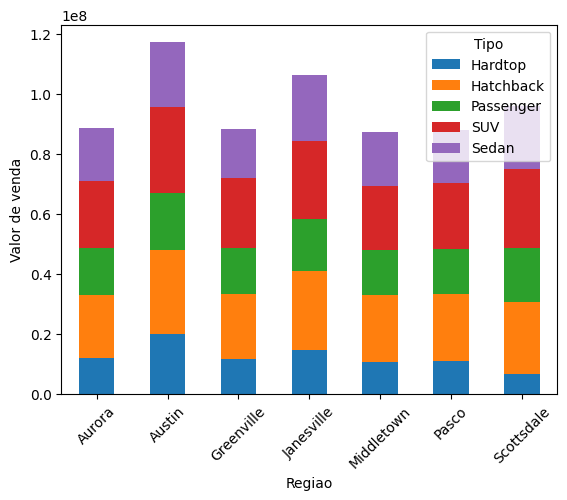

In [259]:
#fiz um tabela com os 10 melhores revendedores
revendedor = df['Revendedor'].value_counts().head(10)
revendedortab = pd.DataFrame({'Revendedor': revendedor.index,
                                    'Contagem': revendedor.values})
print(revendedortab)

#em seguida um grafico empilhado, mostrando regioes com maiores vendas ($) por tipo de carro vendido
regiao=df.groupby(['Região_Revendedor','Tipo'])['preco($)'].sum().unstack()
regiao.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Valor de venda')
plt.xlabel('Regiao')
plt.show()

 *Com base apenas nesse dataset, o carro mais vendido foi um SUV e/ou hatch, de transmissão automática, na cor branca, com valores entre 25-35k, em Austin.
 infiro que os picos de venda em fim de ano sejam devido às datas comemorativas*
